<a href="https://colab.research.google.com/github/sancarhacer/DataSciencewithPython/blob/main/11_IntroToFeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Missing Values in Feature Engineering
Gerçek dünya verileriyle çalışırken, eksik değerler yaygın bir sorundur. feature engineering de, eksik değerleri doğru şekilde ele almak çok önemlidir çünkü bunlar makine öğrenimi modellerinin performansını etkileyebilir.
## Types of Missing Values
Missing values can be categorized into three main types:

 ### 1. Missing Completely at Random (MCAR)
* Eksik değerler **rastgele** bir şekilde oluşur ve veri kümesindeki **başka hiçbir değişkenle ilişkisi yoktur**.
* **Örnek:** Bir kişinin bir ankette yaş bilgisini doldurmayı unutması.
* **Etkisi:** Herhangi bir **yanlılık (bias)** ortaya çıkmaz ve eksik değerleri veri kümesinden **çıkarmak (dropping)** veya ortalama/medyan gibi basit bir yöntemle **doldurmak (imputing)** genellikle uygun çözümlerdir.
 ### 2. Missing at Random (MAR)
* Eksik değerler, veri kümesindeki **gözlemlenen diğer değişkenlerle ilişkilidir**, ancak **eksik verinin kendisiyle ilişkili değildir**.
* **Örnek:** Bir tıbbi veri kümesinde, erkeklerin kilo hakkındaki bir soruyu atlama olasılığı daha yüksektir, ancak her cinsiyet grubunun içinde kilo rastgele bir şekilde eksiktir.
* **Etkisi:** Regresyon veya ilgili özellikleri kullanarak eksik değerleri doldurma gibi daha **gelişmiş doldurma (imputation) yöntemleri** faydalı olabilir.
 ### 3. Missing Not at Random (MNAR)
* Eksik değerler, **gözlemlenmemiş (unobserved) verinin kendisine bağlıdır**, yani kayıp olmanın nedeni rastgele değildir.
* **Örnek:** Geliri yüksek olan kişiler bir ankette maaşlarını bildirmemeyi tercih edebilir.
* **Etkisi:** Bu durum **yanlılığa (bias)** yol açabilir ve MNAR ile başa çıkmak genellikle alan bilgisi (domain knowledge) veya kayıp olma durumunu ayrı olarak modelleme gibi özel teknikler gerektirir.
---
## Özellik Mühendisliğinde Eksik Değerleri Ele Alma Yöntemleri
Eksik değerlerin türünü belirledikten sonra, onlarla nasıl başa çıkacağımıza karar verebiliriz:

### 1. Eksik Değerleri Kaldırma (Kayıp Oranı Düşükse)
* Eğer bir özellikte çok az sayıda eksik değer varsa (örneğin, veri kümesinin $<5\%$’inden azı), bu satırları doğrudan kaldırmak modelin performansını önemli ölçüde etkilemeyebilir.

* Example:

`df.dropna(inplace=True)`
 ### 2. Imputation (Filling Missing Values)
* **Ortalama/Medyan/Mod Doldurma:** Eksik değerleri ortalama (sayısal veriler için), medyan (çarpık sayısal veriler için) veya mod (kategorik veriler için) ile değiştirme.

   `df['Age'].fillna(df['Age'].mean(), inplace=True)  # Mean Imputation`
* **Forward or Backward Fill:** Filling missing values using previous or next available values (good for time series data).

`   df.fillna(method='ffill', inplace=True)  # Forward fill`
* **Predictive Imputation:** Using models like regression or KNN to estimate missing values.



```
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
```


 ### 3. Adding Missing Indicators
Eksik değerleri doldurmak yerine, bir değerin eksik olup olmadığını işaretleyen (flag) yeni bir sütun oluşturabiliriz.

df['Age_missing'] = df['Age'].isnull().astype(int)

###4. Using Domain Knowledge

* **MNAR** (Rastgele Olmayan Kayıp) vakalarında, bazen **alan uzmanlığı (domain expertise)** en iyi yaklaşıma karar vermemize yardımcı olabilir.
* **Örnek:** Eksik gelir değerleri yüksek maaşları gösteriyorsa, bunları sadece ortalama ile doldurmak yerine **"yüksek gelirli"** olarak gruplandırabiliriz.

---
#### Özet Tablo

| Kayıp Veri Türü | Örnek | En İyi Ele Alma Yöntemleri|
|-----------------------|----------------------------------------|---------------------------------------------------|
| **MCAR** (Tamamen Rastgele) | Ankette rastgele eksik yaş değerleri | Satırları kaldırma veya basit doldurma kullanma |
| **MAR** (Rastgele) | Eksik gelir değerlerinin eğitim düzeyine bağlı olması | Doldurma için regresyon veya ilgili özellikleri kullanma |
| **MNAR** (Rastgele Olmayan)| Yüksek kazanç sahiplerinin maaş bildirmemesi | Alan bilgisini kullanma veya kayıp olma durumunu modelleme |

---
#### Son İpucu:
Eksik değerleri nasıl ele alacağınıza karar vermeden önce, kayıp olmanın arkasındaki nedeni anlamak için daima **verilerinizi keşfedin**. Doğru ele alma, makine öğrenimi modelinizin doğruluğunu önemli ölçüde artırabilir!

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.shape

(891, 15)

In [ ]:
## Column deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

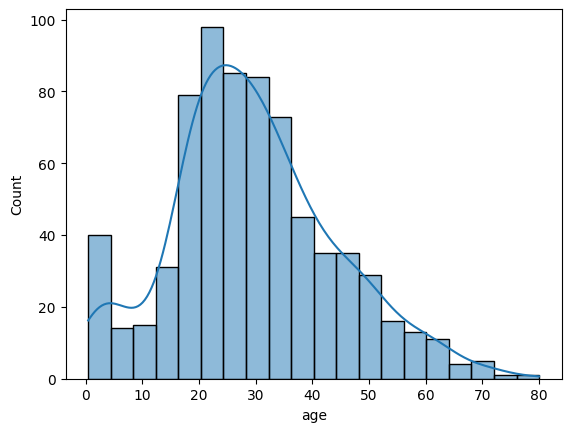

In [ ]:
#imputation
# mean imputation
sns.histplot(df['age'], kde=True)

<Axes: ylabel='age'>

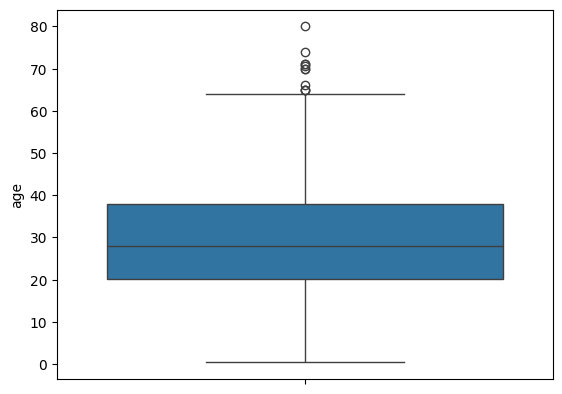

In [ ]:
sns.boxplot(df['age'])

In [ ]:
df["age_median"] = df["age"].fillna(df["age"].median())
df[["age_median","age"]]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [ ]:
# mode imputation -> categorical values
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0


In [ ]:
# df['embarked'].dropna()


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df["embarked_mode"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [ ]:
df['embarked_mode'].isnull().sum()

np.int64(0)